## Programming for Risk Analytics

## Formula one

#### Introduction

Formula one, also known as F1, popular for its high speed racing, innovative technology and home to some of the biggest names in sports. Data is often collected by teams from previous races, circuit testing and practices and analysed. The analysis of data from races is essential for teams to develop strategies on pit stops, tyres and to develop certain specifications of the car.

This analysis will look at the data from the F1 season 2022, specifcally 3 parts; 1) Drivers and Diversity in the sport, 2) Overall performance of drivers in the 2022 season and whether any statiscal distributions can be used, and 3) Relationship between Grand prix and podiums.

NOTE: For simplicity of calculations, we will not be including sprint race points, this will not affect our analysis as long as the rest of the data is consistent.

Dataset is available at: https://github.com/toUpperCase78/formula1-datasets

In [1]:
# Import libraies for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Import the Datasets for the analysis

In [2]:
# Import and read the datasets from the directory
# We make use of the 'read_csv' function from pandas to read an CSV file.

# Read data from the sheet 'F1_2022season_calendar.csv' and store it in the 'df' DataFrame.
df = pd.read_csv('F1_2022season_calendar.csv')

# Read data from the sheet 'F1_2022season_drv.csv' and store it in the 'df1' DataFrame.
df1 = pd.read_csv('F1_2022season_drv.csv')

# Read data from the sheet 'F1_2022season_raceRes.csv' and store it in the 'df2' DataFrame.
df2 = pd.read_csv('F1_2022season_raceRes.csv')

# Variables 'df1' and 'df2' holds data from their respective sheets for further analysis.

In [3]:
# We can display the data by returning the variables "df", "df1" and "df2"
df

Round   Race Date                                            GP Name  \
0       1  20/03/2022                                Gulf Air Bahrain GP   
1       2  27/03/2022                               STC Saudi Arabian GP   
2       3  10/04/2022                             Heineken Australian GP   
3       4  24/04/2022  Rolex Gran Premio Del Made in Italy e Dell'Emi...   
4       5  08/05/2022                                Crypto.com Miami GP   
5       6  22/05/2022                      Pirelli Gran Premio de España   
6       7  29/05/2022                               Grand Prix de Monaco   
7       8  12/06/2022                                      Azerbaijan GP   
8       9  19/06/2022                           AWS Grand Prix du Canada   
9      10  03/07/2022                                  Lenovo British GP   
10     11  10/07/2022                 Rolex Grosser Preis von Österreich   
11     12  24/07/2022                        Lenovo Grand Prix de France   
12     13  31/07/2022                              Aramco Magyar Nagydij   
13     14  28/08/2022                                   Rolex Belgian GP   
14     15  04/09/2022                                  Heineken Dutch GP   
15     16  11/09/2022                       Pirelli Gran Premio D'Italia   
16     17  02/10/2022                    Singapore Airlines Singapore GP   
17     18  09/10/2022                                  Honda Japanese GP   
18     19  23/10/2022                            Aramco United States GP   
19     20  30/10/2022                 Gran Premio de la Ciudad de México   
20     21  13/11/2022                  Heineken Gran Prêmio de São Paulo   
21     22  20/11/2022                        Etihad Airways Abu Dhabi GP   

          Country               City                        Circuit Name  \
0         Bahrain             Sakhir       Bahrain International Circuit   
1    Saudi Arabia             Jeddah             Jeddah Corniche Circuit   
2       Australia          Melbourne                 Albert Park Circuit   
3           Italy              Imola       Autodromo Enzo e Dino Ferrari   
4   United States              Miami       Miami International Autodrome   
5           Spain          Catalunya      Circuit de Barcelona-Catalunya   
6          Monaco        Monte Carlo                   Circuit de Monaco   
7      Azerbaijan               Baku                   Baku City Circuit   
8          Canada           Montréal           Circuit Gilles-Villeneuve   
9   Great Britain        Silverstone                 Silverstone Circuit   
10        Austria          Spielberg                       Red Bull Ring   
11         France       Le Castellet                 Circuit Paul Ricard   
12        Hungary           Budapest                         Hungaroring   
13        Belgium  Spa-Francorchamps        Circuit de Spa-Francorchamps   
14    Netherlands          Zandvoort                   Circuit Zandvoort   
15          Italy              Monza           Autodromo Nazionale Monza   
16      Singapore          Singapore           Marina Bay Street Circuit   
17          Japan             Suzuka  Suzuka International Racing Course   
18  United States             Austin             Circuit of the Americas   
19         Mexico        Mexico City        Autodromo Hermanos Rodriguez   
20         Brazil          São Paulo          Autodromo Jose Carlos Pace   
21      Abu Dhabi         Yas Island                  Yas Marina Circuit   

    First GP  Number of Laps  Circuit Length(km)  Race Distance(km)  \
0       2004              57               5.412            308.238   
1       2021              50               6.174            308.450   
2       1996              58               5.278            306.124   
3       1980              63               4.909            309.049   
4       2022              57               5.412            308.326   
5       1991              66               4.675            308.424   
6       1

In [4]:
df1

Driver Abbreviation  No             Team         Country  \
0     Max Verstappen          VER   1  Red Bull Racing     Netherlands   
1    Charles Leclerc          LEC  16          Ferrari          Monaco   
2       Sergio Perez          PER  11  Red Bull Racing          Mexico   
3     George Russell          RUS  63         Mercedes  United Kingdom   
4       Carlos Sainz          SAI  55          Ferrari           Spain   
5     Lewis Hamilton          HAM  44         Mercedes  United Kingdom   
6       Lando Norris          NOR   4          McLaren  United Kingdom   
7       Esteban Ocon          OCO  31           Alpine          France   
8    Fernando Alonso          ALO  14           Alpine           Spain   
9    Valtteri Bottas          BOT  77       Alfa Romeo         Finland   
10  Daniel Ricciardo          RIC   3          McLaren       Australia   
11  Sebastian Vettel          VET   5     Aston Martin         Germany   
12   Kevin Magnussen          MAG  20     Haas F1 Team         Denmark   
13      Pierre Gasly          GAS  10       AlphaTauri          France   
14      Lance Stroll          STR  18     Aston Martin          Canada   
15   Mick Schumacher          MSC  47     Haas F1 Team         Germany   
16      Yuki Tsunoda          TSU  22       AlphaTauri           Japan   
17       Guanyu Zhou          ZHO  24       Alfa Romeo           China   
18   Alexander Albon          ALB  23         Williams        Thailand   
19   Nicholas Latifi          LAT   6         Williams          Canada   
20     Nyck De Vries          DEV  45         Williams     Netherlands   
21   Nico Hulkenberg          HUL  27     Aston Martin         Germany   

    Podiums  Points  Grands Prix Entered  World Championships  \
0        77  2011.5                  163                    2   
1        24   868.0                  103                    0   
2        26  1201.0                  236                    0   
3         9   294.0                   82                    0   
4        15   782.5                  163                    0   
5       191  4405.5                  310                    7   
6         6   428.0                   82                    0   
7         2   364.0                  111                    0   
8        98  2061.0                  358                    2   
9        67  1787.0                  200                    0   
10       32  1311.0                  232                    0   
11      122  3098.0                  300                    4   
12        1   183.0                  142                    0   
13        3   332.0                  108                    0   
14        3   194.0                  122                    0   
15        0    12.0                   43                    0   
16        0    44.0                   44                    0   
17        0     6.0                   22                    0   
18        2   201.0                   59                    0   
19        0     9.0                   61                    0   
20        0     2.0                    1                    0   
21        0   521.0                  184                    0   

   Highest Race Finish  Highest Grid Position Date of Birth  \
0               1(x35)                      1    30/09/1997   
1                1(x5)                      1    16/10/1997   
2                1(x4)                      1    26/01/1990   
3                1(x1)                      1    15/02/1998   
4                1(x1)                      1    01/09/1994   
5              1(x103)                      1    07/01/1985   
6                2(x1)                      1    13/11/1999   
7                1(x1)                      3    17/09/1996   
8               1(x32)                      1    29/07/1981   
9               1(x10)                      1    28/08/1989   
10               1(x8)                      1    01/07/1989   
11              1(x53)                      1    03/07/1987

In [5]:
df2

Track Position  No           Driver               Team  \
0      Bahrain        1  16  Charles Leclerc            Ferrari   
1      Bahrain        2  55     Carlos Sainz            Ferrari   
2      Bahrain        3  44   Lewis Hamilton           Mercedes   
3      Bahrain        4  63   George Russell           Mercedes   
4      Bahrain        5  20  Kevin Magnussen       Haas Ferrari   
..         ...      ...  ..              ...                ...   
435  Abu Dhabi       16  47  Mick Schumacher       Haas Ferrari   
436  Abu Dhabi       17  20  Kevin Magnussen       Haas Ferrari   
437  Abu Dhabi       18  44   Lewis Hamilton           Mercedes   
438  Abu Dhabi       19   6  Nicholas Latifi  Williams Mercedes   
439  Abu Dhabi       NC  14  Fernando Alonso     Alpine Renault   

     Starting Grid  Laps Time/Retired  Points +1 Pt Fastest Lap  
0                1    57  1:37:33.584      26   Yes    1:34.570  
1                3    57       +5.598      18    No    1:35.740  
2                5    57       +9.675      15    No    1:36.228  
3                9    57      +11.211      12    No    1:36.302  
4                7    57      +14.754      10    No    1:36.623  
..             ...   ...          ...     ...   ...         ...  
435             12    57       +1 lap       0    No    1:29.833  
436             16    57       +1 lap       0    No    1:31.158  
437              5    55          DNF       0    No    1:29.788  
438             20    55          DNF       0    No    1:30.309  
439             10    27          DNF       0    No    1:30.579  

[440 rows x 11 columns]

## Now that we have the data imported, we need to check the datatypes;

### What are the data types of the variables in the datasets?

In [6]:
# Checking the data types for variable "df"
df.dtypes

Round                   int64
Race Date              object
GP Name                object
Country                object
City                   object
Circuit Name           object
First GP                int64
Number of Laps          int64
Circuit Length(km)    float64
Race Distance(km)     float64
Lap Record             object
Record Owner           object
Record Year             int64
Turns                   int64
DRS Zones               int64
dtype: object

In [7]:
# Checking the data types for variable "df1"
df1.dtypes

Driver                    object
Abbreviation              object
No                         int64
Team                      object
Country                   object
Podiums                    int64
Points                   float64
Grands Prix Entered        int64
World Championships        int64
Highest Race Finish       object
Highest Grid Position      int64
Date of Birth             object
Place of Birth            object
dtype: object

In [8]:
# Checking the data types for variable "df2"
df2.dtypes

Track            object
Position         object
No                int64
Driver           object
Team             object
Starting Grid     int64
Laps              int64
Time/Retired     object
Points            int64
+1 Pt            object
Fastest Lap      object
dtype: object

All the data types are in thier correct form and hence will allow for an easier analysis and will also enable the appropriate plotting of graphs. Furthermore, we do not have to rename any columns as they are all labelled appropriately.

## Section A: Drivers

### Who were the drivers on the grid for the 2022 season and what was their corresponding country of origin (How diverse is the sport) ?

In [9]:
# Define a fucntion by selecting the column of drivers for 2022 season
Driver_columns = df1['Driver']

# Now we will create a list of the drivers for the 2022 season
driver_list = list(Driver_columns)
print("List of Drivers - F1 2022 Season")
print(driver_list)

List of Drivers - F1 2022 Season
['Max Verstappen', 'Charles Leclerc', 'Sergio Perez', 'George Russell', 'Carlos Sainz', 'Lewis Hamilton', 'Lando Norris', 'Esteban Ocon', 'Fernando Alonso', 'Valtteri Bottas', 'Daniel Ricciardo', 'Sebastian Vettel', 'Kevin Magnussen', 'Pierre Gasly', 'Lance Stroll', 'Mick Schumacher', 'Yuki Tsunoda', 'Guanyu Zhou', 'Alexander Albon', 'Nicholas Latifi', 'Nyck De Vries', 'Nico Hulkenberg']


In [10]:
# We will put the above list into a matrix

# We do this using the np.array function
matrix_drivers = np.array([driver_list])
print("Matrix for the Drivers - F1 2022")
print(matrix_drivers)

# We can also find the total number of drivers for the 2022 season by using the shape fucntion
num_of_drivers = matrix_drivers.shape

# The above will return (1,22); we need to return this as an integer
int_num_of_drivers = int(matrix_drivers.shape[1])

# We use [1] to get the integer 22, as python uses zero based numbering (Starts couting from 0)

# Make use of the code below to add spaces between outputs
print()

# Now we return the variable int_num_of_drivers
print("Number of Drivers - F1 2022:", int_num_of_drivers)

Matrix for the Drivers - F1 2022
[['Max Verstappen' 'Charles Leclerc' 'Sergio Perez' 'George Russell'
  'Carlos Sainz' 'Lewis Hamilton' 'Lando Norris' 'Esteban Ocon'
  'Fernando Alonso' 'Valtteri Bottas' 'Daniel Ricciardo'
  'Sebastian Vettel' 'Kevin Magnussen' 'Pierre Gasly' 'Lance Stroll'
  'Mick Schumacher' 'Yuki Tsunoda' 'Guanyu Zhou' 'Alexander Albon'
  'Nicholas Latifi' 'Nyck De Vries' 'Nico Hulkenberg']]

Number of Drivers - F1 2022: 22


In [11]:
# Same as above, but this time create a list for the country's
country_columns = df1['Country']
country_list = list(country_columns)


# Put the list of country's in a matrix
matrix_country = np.array([country_list])
print("Matrix for the Drivers Country of Origin - F1 2022")
print(matrix_country)

Matrix for the Drivers Country of Origin - F1 2022
[['Netherlands' 'Monaco' 'Mexico' 'United Kingdom' 'Spain'
  'United Kingdom' 'United Kingdom' 'France' 'Spain' 'Finland'
  'Australia' 'Germany' 'Denmark' 'France' 'Canada' 'Germany' 'Japan'
  'China' 'Thailand' 'Canada' 'Netherlands' 'Germany']]


In [12]:
# If we want to match the drivers to their respective country's we do the below

# Say we wanted the 3rd driver and his corresponding country
third_driver = driver_list[2]
third_country = country_list[2]

# To find the 3rd driver we use [2] as python uses zero base numbering

# We can replace [] with any number, to match a driver and their corresponding country

# As the above are strings we can add them, we use " " to add a space when adding the strings
print(third_driver+ " " +third_country)

Sergio Perez Mexico


In [13]:
# As there are some drivers from the same country we will simplify the matrix, by counting the number of duplicate countries
# Count the occurence of the countries using for loop and If-Else statements

# Use the function below to count the number of countries
def countryoccurrence(items):
    
# Define the dictionary    
    out = {}

# Create the for-loop
    for item in items:
        if item in out:
            out[item] +=1
        else:
            out[item] =1
    return out

# Using the list of countries
country_list = list(country_columns)

# Count the ocuurance of the countries
countryoccurrence(country_list)

print("Frequency of Occurrunce of Countries")
print(countryoccurrence(country_list))

Frequency of Occurrunce of Countries
{'Netherlands': 2, 'Monaco': 1, 'Mexico': 1, 'United Kingdom': 3, 'Spain': 2, 'France': 2, 'Finland': 1, 'Australia': 1, 'Germany': 3, 'Denmark': 1, 'Canada': 2, 'Japan': 1, 'China': 1, 'Thailand': 1}


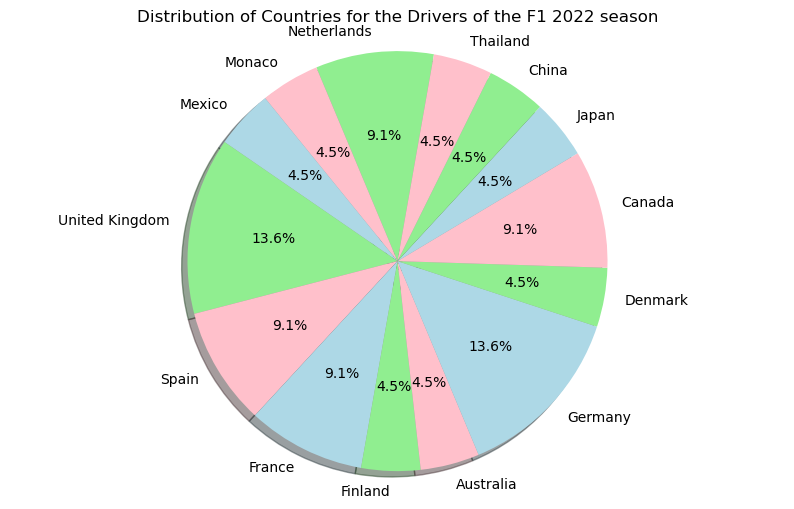

In [14]:
# The above shows there are multiple of the same countries
# This can be represented in a pie chart

# Below is the data to plot
labels = 'Netherlands', 'Monaco', 'Mexico', 'United Kingdom', 'Spain', 'France', 'Finland', 'Australia', 'Germany', 'Denmark', 'Canada', 'Japan', 'China', 'Thailand' 
sizes = [2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1]

colors = ['lightgreen', 'pink', 'lightblue']

# Plot a pie chart with the pie() function.
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=80)
 
# This function makes the axis equal, so the chart is round
plt.axis('equal')

# Add a title to the plot
plt.title("Distribution of Countries for the Drivers of the F1 2022 season")

# Show the plot
plt.show()

We can see that for the 2022 season, there were 22 drivers on the grid and who these drivers came from 14 countries. The pie chart shows, the vast diversity of the sport, as the drivers represent almost every continent around the world. 2022 saw the debut of Guanyu Zhou, the first ever Chinese driver in F1.

## Section B: Performance in the 2022 Season

The dataset does not give a a total sum of the points per driver and does not indicate who won the 2022 season.

### Who were the top 5 and bottom 5 drivers of 2022?

### Can we visually present the top and bottom 5 in a chart?

In [15]:
 # Define a fucntion for the total race points for each driver
driver_points = df2.groupby('Driver')['Points'].sum().sort_values(ascending=False)

# The above function will list all drivers, starting with the higest points to the lowest

# Before listing the Top and Bottom 5 drivers we can see the the highest and lowest points
highest_points = driver_points.max()
lowest_points = driver_points.min()

# Return the above to obtain the highest and lowest points scored
print("Highest Points Scored: -", highest_points)

print()

print("Lowest Points Scored -", lowest_points)

Highest Points Scored: - 433

Lowest Points Scored - 0


In [16]:
 # Define a fucntion for the total race points for each driver
def sum_of_driver_points(df2):
    
# Grouping the dataframe to find the sum of points from biggest to smallest    
    driver_points = df2.groupby('Driver')['Points'].sum().sort_values(ascending=False)

# Defining top and bottom 5 and using .head() and .tail() to return the top and bottom 5 points and drivers
    top_5 = driver_points.head(5)
    bottom_5 = driver_points.tail(5)
    
    print("\nTop 5 Drivers of 2022", driver_points.head(5))
    print("\nBottom 5 Drivers of 2022", driver_points.tail(5))

sum_of_driver_points(df2)

# The highest and lowest points match the with code the cell above


Top 5 Drivers of 2022 Driver
Max Verstappen     433
Charles Leclerc    291
Sergio Perez       291
George Russell     262
Lewis Hamilton     233
Name: Points, dtype: int64

Bottom 5 Drivers of 2022 Driver
Guanyu Zhou        6
Alexander Albon    4
Nyck De Vries      2
Nicholas Latifi    2
Nico Hulkenberg    0
Name: Points, dtype: int64


Text(0.5, 1.0, 'Bottom 5 Drivers - F1 2022 Season')

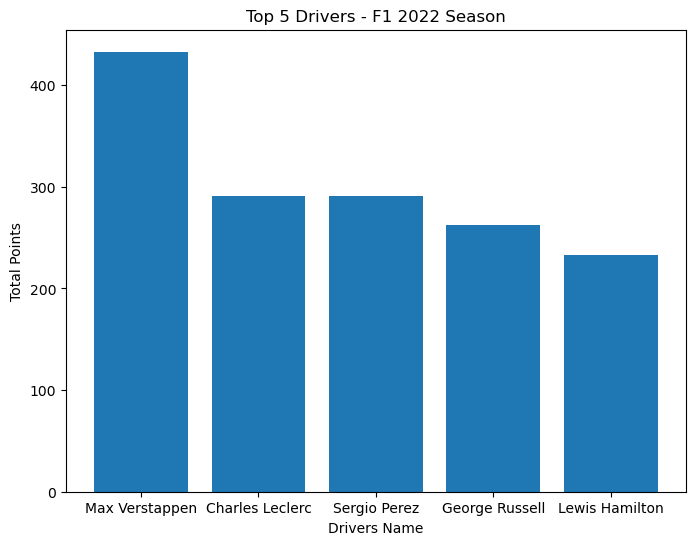

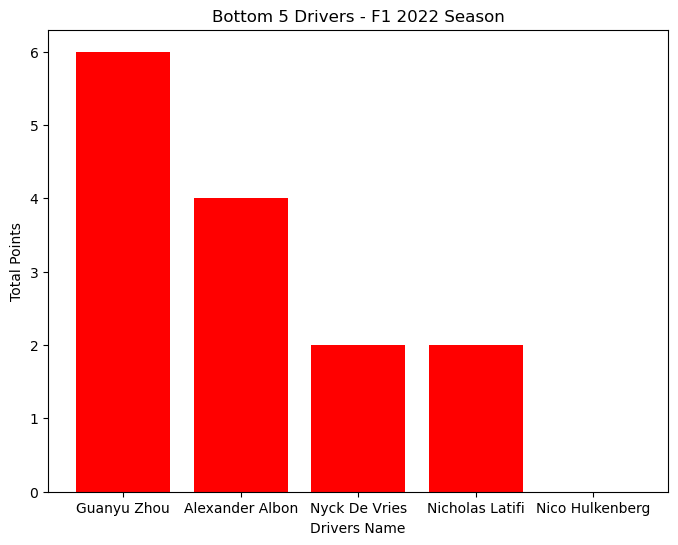

In [17]:
# Again Defining the top and bottom 5
top_5 = driver_points.head(5)
bottom_5 = driver_points.tail(5)


# To better visualise the list, we plot a bar chart using the plt.bar() fucntion

# Plot a bar chart for the top 5 drivers 
plt.figure(figsize=(8, 6))
plt.bar(top_5.index, top_5.values, width=0.8)

# Label the x axis
plt.xlabel("Drivers Name")

# Label the y axis
plt.ylabel("Total Points")

# Label the bar chart
plt.title("Top 5 Drivers - F1 2022 Season")

# Plot the bar chart for the bottom 5 drivers
plt.figure(figsize=(8, 6))
plt.bar(bottom_5.index, bottom_5.values, width=0.8, color="Red")

# Label the x axis
plt.xlabel("Drivers Name")

# Label the y axis
plt.ylabel("Total Points")

# Label the bar chart
plt.title("Bottom 5 Drivers - F1 2022 Season")

From the graph above we can see that Max Verstappen scored the most points (433) for the 2022 season and hence won the world championship. Although both Red Bull drivers were in the Top 5, the graph shows a small gap between P2 and P5, showing that competiveness had increased among the teams.

### Section C: Distributions

Let us now perform an individual analysis of Max Verstappen, to see whether we can analyse any interesting trends on his Championship winning season. 

### Does Max Verstappen's points for 2022 follow a normal distribtution?

In [18]:
# Selecting the relvant columns
selected_columns = ['Driver', 'Points', 'Track']

# Filter the DataFrame for  the driver'Max Verstappen'
m_verst = df2[df2['Driver'] == 'Max Verstappen']

# Now we have all the relevant information for Max
print(m_verst)

              Track Position  No          Driver                  Team  \
18          Bahrain       19   1  Max Verstappen  Red Bull Racing RBPT   
20     Saudi Arabia        1   1  Max Verstappen  Red Bull Racing RBPT   
57        Australia       NC   1  Max Verstappen  Red Bull Racing RBPT   
60   Emilia Romagna        1   1  Max Verstappen  Red Bull Racing RBPT   
80            Miami        1   1  Max Verstappen  Red Bull Racing RBPT   
100           Spain        1   1  Max Verstappen  Red Bull Racing RBPT   
122          Monaco        3   1  Max Verstappen  Red Bull Racing RBPT   
140      Azerbaijan        1   1  Max Verstappen  Red Bull Racing RBPT   
160          Canada        1   1  Max Verstappen  Red Bull Racing RBPT   
186   Great Britain        7   1  Max Verstappen  Red Bull Racing RBPT   
201         Austria        2   1  Max Verstappen  Red Bull Racing RBPT   
220          France        1   1  Max Verstappen  Red Bull Racing RBPT   
240         Hungary        1   1  Max 

In [19]:
# Before plotting a normal distribution, we need to calculate the mean, standard deviation and number of samples

# From the above, select Max Verstappen's points for the 2022 season
max_verstappen_points = m_verst['Points']

# Calculate the mean and standard deviation of 'Points' for Max Verstappen
mean_max_points = m_verst['Points'].mean()
std_max_points = m_verst['Points'].std()

# Print the mean and standard deviation, we will round both outputs to 2 decimal places
print("\nMean of Max Verstappen Points for 2022:", round(mean_max_points,2))
print("\nStandard Deviation for Max Verstappen Points for 2022:", round(std_max_points,2))

# Now we can plot the normal distribution 

# First define the number of samples, which will be the number of races Max Verstappen participated in for 2022

# To do this we can calculate the lentgh of variable "max_verstappen_points"
n_samples = len(max_verstappen_points)

print("\nThe number of samples:", n_samples)


Mean of Max Verstappen Points for 2022: 19.68

Standard Deviation for Max Verstappen Points for 2022: 9.2

The number of samples: 22


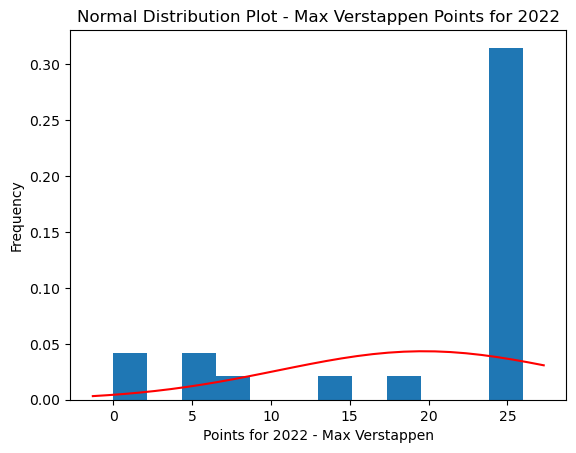

In [20]:
# Now that we have the mean, standard devaition and number of samples we can plot the normal distribution

# Plot a normal distribution
normal_dist = np.random.normal(mean_max_points, std_max_points, n_samples)
plt.figure()
plt.title('Normal Distribution Plot - Max Verstappen Points for 2022')

#Plot histogram
plt.hist(max_verstappen_points, bins=12, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 30)
pdf = stats.norm.pdf(x, mean_max_points, std_max_points)
plt.plot(x, pdf, 'r')

# Label the x axis
plt.xlabel("Points for 2022 - Max Verstappen")

# Label the y axis
plt.ylabel("Frequency")

plt.show()

Above, we have assumed the data follows a normal distribution and have attempted to plot it. However, we can infer that the data does not necessarily follow a normal distribution as it does have a bell shape, meaning it is not symetric about the mean. Hence, this model may not be the best fit for the data.

### Section D: Relationships and correlations between variables

### Is there a relationship between number of Grand Prix Entered and Number of Podiums?

Now let us perform a regression analysis; we will look at 2 variables, number of grand prix entered vs the number of podiums (1st, 2nd or 3rd) a driver has throughout their career. If a driver has entered in a lot races does it necessarily mean they should scored several podiums or are they other factors affecting number of podiums?

In [21]:
# First look at df1 and select the relevant columns  
# Read data from df;F1_2022season_calendar.csv' and store it in the 'df' DataFrame.
df1 = pd.read_csv('F1_2022season_drv.csv')

# Ideally we would only want the columns of the 'Drivers', 'Grand Prix entered' and 'Podiums'
# To do this, Filter the data frame to remove all columns except 'Drivers', 'Grand Prix entered' and 'Podiums'
grand_prix_v_podiums = df1.drop(['Abbreviation', 'No', 'Team', 'Country', 'Points', 'World Championships', 'Highest Race Finish', 'Highest Grid Position', 'Date of Birth', 'Place of Birth'], axis=1)

# We can visualise the table as well
grand_prix_v_podiums

Driver  Podiums  Grands Prix Entered
0     Max Verstappen       77                  163
1    Charles Leclerc       24                  103
2       Sergio Perez       26                  236
3     George Russell        9                   82
4       Carlos Sainz       15                  163
5     Lewis Hamilton      191                  310
6       Lando Norris        6                   82
7       Esteban Ocon        2                  111
8    Fernando Alonso       98                  358
9    Valtteri Bottas       67                  200
10  Daniel Ricciardo       32                  232
11  Sebastian Vettel      122                  300
12   Kevin Magnussen        1                  142
13      Pierre Gasly        3                  108
14      Lance Stroll        3                  122
15   Mick Schumacher        0                   43
16      Yuki Tsunoda        0                   44
17       Guanyu Zhou        0                   22
18   Alexander Albon        2                   59
19   Nicholas Latifi        0                   61
20     Nyck De Vries        0                    1
21   Nico Hulkenberg        0                  184

In [22]:
# Now we store the 2 variables into new data frame
podiums = df1['Podiums']

grand_prix = df1['Grands Prix Entered']

In [23]:
# Perform a linear regression, print the R-squared value and plot the graph 
# We will plot number of grand prix on the x axis and number of podiums on the y axis
x_data = grand_prix
y_data = podiums

# linear regression formula
reg = stats.linregress(x_data, y_data)

# R squared value
r_squared = reg.rvalue**2
print("R-squared: %f" % r_squared)

R-squared: 0.619661


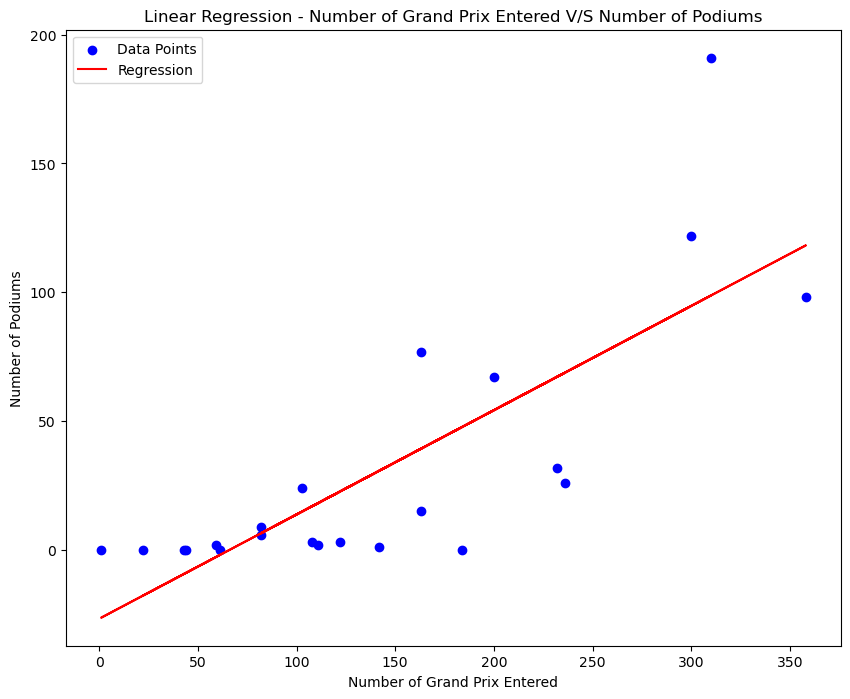

In [24]:
# Generate a plot for the regression
reg_line = reg.intercept + reg.slope * x_data

# Plot a scatter plot
plt.figure(figsize = (10, 8))
plt.scatter(x_data, y_data, label="Data Points", c="Blue")

# Plot the regression line
plt.plot(x_data, reg_line, label="Regression", c="Red")
plt.legend(fontsize = 10)

# Label the axis
plt.xlabel("Number of Grand Prix Entered")
plt.ylabel("Number of Podiums")

# Label the graph
plt.title("Linear Regression - Number of Grand Prix Entered V/S Number of Podiums")
plt.show()

The graph above shows a positive correlation between number of grand prix entered and number of podiums and we have a high positive R-squared value, which indicates a better fit to the regression model, there also seems to be equal number of points below and above the line of best fit. Although there is a postive correlation, it may not indicate causation, as there a few drivers who have entered several grand prix but who are yet to score a podium and vice versa.